In [1]:
# Imports
import numpy as np
import math

In [2]:
# Let's create our 2-qubit basis states

state_00 = np.array([[1],[0],[0],[0]])
state_01 = np.array([[0],[1],[0],[0]])
state_10 = np.array([[0],[0],[1],[0]])
state_11 = np.array([[0],[0],[0],[1]])

print("Manually created 2 qubit state |00>: \n" + str(state_00))

# We could also achieve the same result by taking the kronecker product of two single qubit states

state_0 = np.array([[1],[0]])
state_1 = np.array([[0],[1]])

print("Kronecker product of |0> and |0>: \n" + str(np.kron(state_0, state_0)))

Manually created 2 qubit state |00>: 
[[1]
 [0]
 [0]
 [0]]
Kronecker product of |0> and |0>: 
[[1]
 [0]
 [0]
 [0]]


In [3]:
# To check for normalisation we can write a function that takes in a state vector and returns a boolean
# Notice that we can make this agnostic to the number of entries, we can just take the length of the inputted state vector

def check_normalisation(state_vector):
  normalisation_sum = 0
  for prob_amp in state_vector:
    normalisation_sum += np.abs(prob_amp)**2
  #The default tolerance on isclose is 1e-9
  return math.isclose(normalisation_sum, 1.0)

print("Is the 2 qubit basis state |01> normalised: " +str(check_normalisation(state_01)))

# Let's create a state that isn't normalised
dummy_state = np.array([[1],[1],[0],[0]])
print("Is the 2 qubit dummy_state normalised: " +str(check_normalisation(dummy_state)))

Is the 2 qubit basis state |01> normalised: True
Is the 2 qubit dummy_state normalised: False


/tmp/ipykernel_9719/3038014641.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isclose(normalisation_sum, 1.0)


In [4]:
# Let's create a function that normalises our state for us if it isn't normalised

def normalise_state(state_vector):
  # First we need the magnitude of our state
  magnitude = 0
  for prob_amp in state_vector:
    magnitude += np.abs(prob_amp)**2
  magnitude = np.sqrt(magnitude)
  # Now multiply the array by 1/magnitude
  if(magnitude > 0):
    return (1/magnitude)*state_vector
  else:
    return "Division by Zero Error"

# Some examples
print("State with 0 magnitude: \n" + str(normalise_state(np.array([[0],[0]]))))
print("Non-normalised Dummy state: \n" + str(normalise_state(dummy_state)))
print("2 Qubit Basis State |10>: \n" + str(normalise_state(state_10)))



State with 0 magnitude: 
Division by Zero Error
Non-normalised Dummy state: 
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]
2 Qubit Basis State |10>: 
[[0.]
 [0.]
 [1.]
 [0.]]


In [5]:
# So to implement a quantum gate we simply multiply the matrix representation of the gate times our state vector

# Let's write down a few single qubit gates first
X_gate = np.array([[0 ,1], [1, 0]])
Y_gate = np.array([[0 ,-1j], [1j, 0]])
Z_gate = np.array([[1 ,0], [0, -1]])
I_gate = np.array([[1 ,0], [0, 1]])
H_gate = (1/np.sqrt(2))*np.array([[1 ,1], [1, -1]])

# So let's consider an initial 2 qubit basis state |00>
# Let's act on the first qubit with the X gate and the second qubit with the H gate
# We first create the kronecker product in the correct order
combined_gates = np.kron(X_gate, H_gate)
output_state   = np.matmul(combined_gates,state_00)

print("Input State: \n" +str(state_00))
print("Combined X and H gates: \n" +str(combined_gates))
print("Output state after acting with X on first qubit and H on second: \n" +str(output_state))

Input State: 
[[1]
 [0]
 [0]
 [0]]
Combined X and H gates: 
[[ 0.          0.          0.70710678  0.70710678]
 [ 0.         -0.          0.70710678 -0.70710678]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.         -0.        ]]
Output state after acting with X on first qubit and H on second: 
[[0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]]


$\text{Initial State: }|00\rangle$

$X \otimes H|00\rangle = X|0_a\rangle \otimes H|0_b\rangle = |1_a\rangle \otimes \left(\frac{|0_b\rangle + |1_b\rangle}{\sqrt{2}}\right) = \frac{|10\rangle + |11\rangle}{\sqrt{2}}$

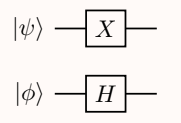

In [6]:
# Now we look at some multi-qubit gates, all expressed in Z basis

swap_gate = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
ctrY_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, -1j], [0, 0, 1j, 0]])
ctrZ_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])

ctrP_gate = lambda phase : np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, np.exp((1j*phase))]])